# Run test

In [1]:
import subprocess

In [4]:
import os
import numpy as np

# V values
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

CGgbrDL= 15e3
Datarate=10
# Simulate
num_sim = 1 # Number of simulations
# for n in [1]:
for n in range(1,num_sim+1):

  for v in [1]:
  # for v in vv:
    print(f"Running simulation with DPP V={v} and RNG run={n}...")
    # cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr-qos-sched -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP --dppV={v} --rngRun={n}> /dev/null 2>&1"
    # os.system(cmd)
    # cmd = f"mv alpha.txt sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
    # os.system(cmd)
    # cmd = f"mv res.txt sim_thput/resDPP_V{v:.2e}_n{n}.txt"
    # os.system(cmd)
    cmd = ["./ns3", "run",
    f"cttc-nr-traffic-3gpp-xr-qos-sched_sergi --Datarate={Datarate} --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP --dppV={v} --rngRun={n} --CGgbrDL={CGgbrDL} > /dev/null 2>&1"
    ]
    subprocess.run(cmd)
    cmd = f"mv alpha.txt sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
 
    os.system(cmd)
    cmd = f"mv res.txt sim_thput/resDPP_V{v:.2e}_n{n}.txt"
    os.system(cmd) 

Running simulation with DPP V=1 and RNG run=1...
Scheduler: ns3::NrMacSchedulerOfdmaDPP
[APP UPDATE] Time 0s | UE RNTI=0 | New DataRate=10 Mbps
Command 'build/contrib/nr/examples/ns3.40-cttc-nr-traffic-3gpp-xr-qos-sched_sergi-default --Datarate=10 --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP --dppV=1 --rngRun=1 --CGgbrDL=15000.0 > /dev/null 2>&1' died with <Signals.SIGSEGV: 11>.


mv: cannot stat 'res.txt': No such file or directory


# Write formatted data to csv

In [13]:
15e3

15000.0

In [3]:
import pandas as pd

In [9]:
df = pd.read_csv('throughput_per_ue.csv')

In [10]:
df.mean()

Time    6.200000
UE0     3.100702
UE1     0.000000
UE2     0.000000
UE3     0.000000
UE4     8.224897
UE5     8.180975
UE6     8.210702
UE7     8.197244
dtype: float64

In [10]:
df

,Time,UE0,UE1,UE2,UE3,UE4,UE5,UE6,UE7
0,0.2,0,0.00000,0,0.00000,0.00000,0,0.00000,0.00000
1,0.4,0,0.00000,0,0.00000,0.00000,0,0.00000,0.00000
2,0.6,0,10.48940,0,3.25392,4.16428,0,7.14472,6.94396
3,0.8,0,7.48988,0,8.66556,10.41310,0,5.71796,5.55932
4,1.0,0,7.49272,0,7.57780,6.24312,0,4.28192,12.51740
...,...,...,...,...,...,...,...,...,...
56,11.4,0,7.48504,0,4.33484,10.40090,0,10.00110,5.54884
57,11.6,0,7.49264,0,5.41600,9.35628,0,8.56760,5.55444
58,11.8,0,8.98668,0,5.40680,10.39570,0,8.55076,5.56308
59,12.0,0,7.49852,0,4.32532,10.39890,0,9.99060,4.16784


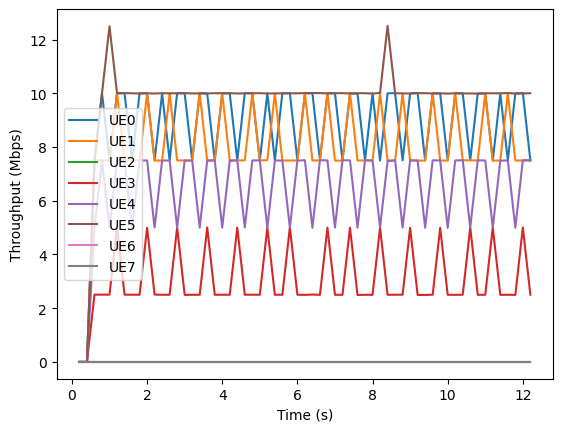

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("throughput_per_ue.csv")

for col in df.columns[1:]:
    plt.plot(df["Time"], df[col], label=col)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.show()

In [15]:
df_throughput_5 = df['UE4']

In [38]:
df

,Time,UE0,UE1,UE2,UE3,UE4,UE5,UE6,UE7
0,0.2,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0
1,0.4,0.00000,0.00000,0,0.00000,0.00000,0.00000,0,0
2,0.6,7.50352,7.51112,0,2.50436,5.00100,7.49960,0,0
3,0.8,10.01180,7.49832,0,2.50444,7.50672,9.99536,0,0
4,1.0,7.49836,7.49588,0,2.50276,4.99648,12.49360,0,0
...,...,...,...,...,...,...,...,...,...
56,11.4,9.99300,7.49688,0,2.49568,7.49320,9.99780,0,0
57,11.6,7.50032,10.00010,0,2.50028,7.49696,10.00750,0,0
58,11.8,9.99608,7.49652,0,2.49412,4.99760,9.99184,0,0
59,12.0,10.00960,7.49968,0,5.00536,7.50724,9.99072,0,0


In [27]:
df = pd.read_csv("debug_updates.csv",sep="\t")

In [28]:
df_rnti = df[df["RNTI"] == 4]

In [30]:
df_rnti.shape

(60, 4)

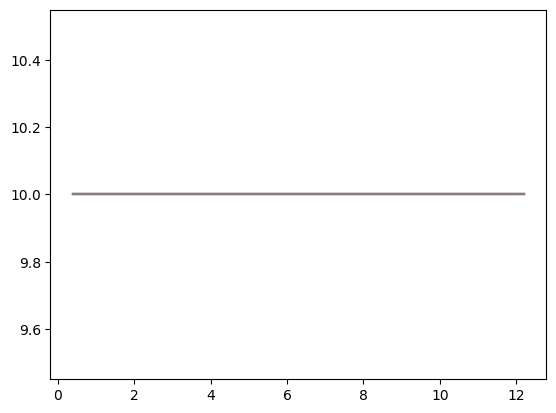

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("debug_updates.csv",sep="\t")
RNTIS=[1,2,3,4,5,6,7,8]
for rnti in RNTIS:
    df_rnti = df[df["RNTI"] == rnti]
    plt.plot(df_rnti["Time(s)"], df_rnti['Traffic(Mbps)'], label=f"UE{rnti-1}")


In [33]:
df_rnti_1 = df[df["RNTI"] == 5]

KeyError: 'RNTI'

In [19]:
df_rnti_1

,Time(s),RNTI,Traffic(Mbps),GFBR(Mbps)
3,0.4,5,12.9854,12.0884
11,0.6,5,19.2039,17.8773
19,0.8,5,15.8908,14.7931
27,1.0,5,11.5226,10.7266
35,1.2,5,15.5061,14.4349
43,1.4,5,17.2122,16.0232
51,1.6,5,17.1669,15.9810
59,1.8,5,17.5184,16.3083
67,2.0,5,18.1943,16.9375
75,2.2,5,13.8520,12.8951


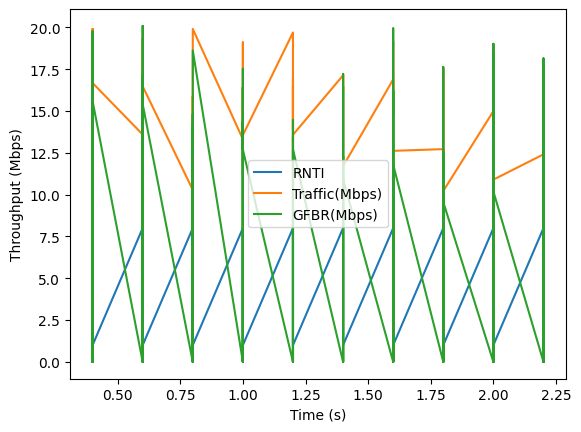

In [ ]:

for col in df.columns[1:]:
    plt.plot(df["Time(s)"], df[col], label=col)

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Throughput (Mbps)")
plt.show()

In [2]:
df

,Time,UE0,UE1,UE2,UE3,UE4,UE5,UE6,UE7
0,0.2,0.00000,0.00000,0,0,0.00000,0.00000,0,0.00000
1,0.4,0.00000,0.00000,0,0,0.00000,0.00000,0,0.00000
2,0.6,7.94244,5.86480,0,0,11.22720,4.40316,0,3.85280
3,0.8,9.53144,7.02664,0,0,12.84250,5.50100,0,3.85672
4,1.0,9.52852,5.85980,0,0,11.22730,4.40064,0,3.85892
...,...,...,...,...,...,...,...,...,...
56,11.4,7.93904,10.55640,0,0,1.60520,5.50264,0,10.60980
57,11.6,6.33636,10.53740,0,0,3.20680,6.60524,0,9.64984
58,11.8,7.93248,10.54180,0,0,1.60456,5.50476,0,10.61180
59,12.0,7.93688,10.55060,0,0,3.20944,5.50724,0,10.61260


In [2]:
import pandas as pd
import os
import numpy as np

# Read data
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

# Simulate
num_sim = 1 # Number of simulations
thPutRes = pd.DataFrame()
for v in vv:
  avgLow,avgHigh  = [],[]
  for n in range(1,num_sim+1):
    fn = f"sim_thput/resDPP_V{v:.2e}_n{n}.txt"
    df = pd.read_csv(fn, delimiter= '\t')
    avgLow.append(df.head(4)['Thput'].mean())
    avgHigh.append(df.tail(4)['Thput'].mean())
    thPutRes[f'V{v:.2e}'] = [np.array(avgLow).mean(), np.array(avgHigh).mean()]
# print(thPutRes)
thPutRes.to_csv('fig2Aux.csv', sep='\t')

prbsRes = pd.DataFrame()
for v in vv:
  avgLow,avgHigh  = [],[]
  for n in range(1,num_sim+1):
    fn = f"sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
    df = pd.read_csv(fn, delimiter= '\t')
    avgLow.append(df[df['UE'] > 4]['resources'].mean())
    avgHigh.append(df[df['UE'] <= 4]['resources'].mean())
    prbsRes[f'V{v:.2e}'] = [np.array(avgLow).mean(), np.array(avgHigh).mean()]
# print(prbsRes)
prbsRes.to_csv('fig3Aux.csv', sep='\t')

# Create paper figures

Scheduler: ns3::NrMacSchedulerOfdmaDPP
[APP UPDATE] Time 0s | UE RNTI=0 | New DataRate=10 Mbps
Command 'build/contrib/nr/examples/ns3.40-cttc-nr-traffic-3gpp-xr-qos-sched_sergi-default --Datarate=10 --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType=DPP --CGgbrDL=10000000.0 > /dev/null 2>&1' died with <Signals.SIGSEGV: 11>.


mv: cannot stat 'res.txt': No such file or directory


Scheduler: ns3::NrMacSchedulerOfdmaRR
Command 'build/contrib/nr/examples/ns3.40-cttc-nr-traffic-3gpp-xr-qos-sched_sergi-default --Datarate=10 --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType=RR --CGgbrDL=10000000.0 > /dev/null 2>&1' died with <Signals.SIGABRT: 6>.


NS_ASSERT failed, cond="dppSched", +0.000000000s -1 file=/home/sergi/5glena-lyapunov-mac-scheduler/contrib/nr/examples/cttc-nr-traffic-3gpp-xr-qos-sched_sergi.cc, line=679
NS_FATAL, terminating
terminate called without an active exception
mv: cannot stat 'res.txt': No such file or directory


Scheduler: ns3::NrMacSchedulerOfdmaMR
Command 'build/contrib/nr/examples/ns3.40-cttc-nr-traffic-3gpp-xr-qos-sched_sergi-default --Datarate=10 --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType=MR --CGgbrDL=10000000.0 > /dev/null 2>&1' died with <Signals.SIGABRT: 6>.


NS_ASSERT failed, cond="dppSched", +0.000000000s -1 file=/home/sergi/5glena-lyapunov-mac-scheduler/contrib/nr/examples/cttc-nr-traffic-3gpp-xr-qos-sched_sergi.cc, line=679
NS_FATAL, terminating
terminate called without an active exception
mv: cannot stat 'res.txt': No such file or directory


Scheduler: ns3::NrMacSchedulerOfdmaPF
Command 'build/contrib/nr/examples/ns3.40-cttc-nr-traffic-3gpp-xr-qos-sched_sergi-default --Datarate=10 --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType=PF --CGgbrDL=10000000.0 > /dev/null 2>&1' died with <Signals.SIGABRT: 6>.


NS_ASSERT failed, cond="dppSched", +0.000000000s -1 file=/home/sergi/5glena-lyapunov-mac-scheduler/contrib/nr/examples/cttc-nr-traffic-3gpp-xr-qos-sched_sergi.cc, line=679
NS_FATAL, terminating
terminate called without an active exception
mv: cannot stat 'res.txt': No such file or directory


Scheduler: ns3::NrMacSchedulerOfdmaQos
Command 'build/contrib/nr/examples/ns3.40-cttc-nr-traffic-3gpp-xr-qos-sched_sergi-default --Datarate=10 --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType=Qos --CGgbrDL=10000000.0 > /dev/null 2>&1' died with <Signals.SIGABRT: 6>.


NS_ASSERT failed, cond="dppSched", +0.000000000s -1 file=/home/sergi/5glena-lyapunov-mac-scheduler/contrib/nr/examples/cttc-nr-traffic-3gpp-xr-qos-sched_sergi.cc, line=679
NS_FATAL, terminating
terminate called without an active exception
mv: cannot stat 'res.txt': No such file or directory


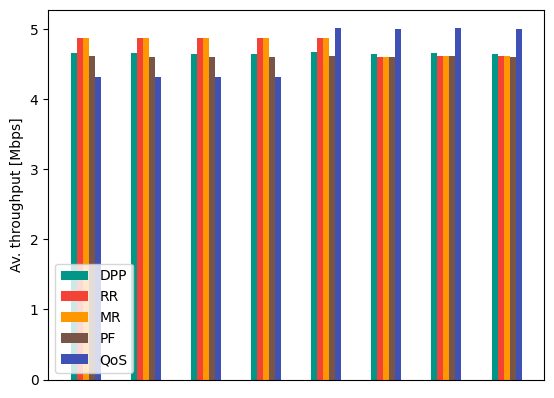

In [2]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import subprocess

CGgbrDL= 10e6
Datarate=10
# Run schedulers
num_sim = 1 # Number of simulations
for n in range(1,num_sim+1):
        # if not os.path.isfile("sim_thput/resDPP_n{n}.txt"):
                # cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr-qos-sched -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType=DPP > /dev/null 2>&1"
                cmd = ["./ns3", "run",
                        f"cttc-nr-traffic-3gpp-xr-qos-sched_sergi --Datarate={Datarate} --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType=DPP --CGgbrDL={CGgbrDL} > /dev/null 2>&1"
                        ]
                # os.system(cmd)
                subprocess.run(cmd)
                cmd = f"mv res.txt sim_thput/resDPP_V0.00e+00_n{n}.txt"
                os.system(cmd)

for s in ['RR', 'MR', 'PF', 'Qos']:
        for n in range(1,num_sim+1):
                # if not os.path.isfile(f"sim_thput/res{s}_n{n}.txt"):
                        cmd = ["./ns3", "run",
                        f"cttc-nr-traffic-3gpp-xr-qos-sched_sergi --Datarate={Datarate} --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=5 --enableOfdma=true --schedulerType={s} --CGgbrDL={CGgbrDL} > /dev/null 2>&1"
                        ]
                        # cmd =  f"./ns3 run cttc-nr-traffic-3gpp-xr-qos-sched_sergi -- --appDuration=10000 --arUeNum=0 --vrUeNum=4 --cgUeNum=4 --enableOfdma=true --schedulerType={s} > /dev/null 2>&1"
                        # os.system(cmd)
                        subprocess.run(cmd)
                        cmd = f"mv res.txt sim_thput/res{s}_n{n}.txt"
                        os.system(cmd)

# Read data
dpp = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resDPP_V0.00e+00_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != "Thput":
                                thput.append(float(row[0]))
        dpp.append(thput)
dpp = np.array(dpp).mean(0)

rr = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resRR_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        rr.append(thput)
rr = np.array(rr).mean(0)

mr = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resMR_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        mr.append(thput)
mr = np.array(mr).mean(0)

pf = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resPF_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        pf.append(thput)
pf = np.array(pf).mean(0)

qos = []
for n in range(1,num_sim+1):
        thput = []
        with open(f'sim_thput/resQos_n{n}.txt') as File:
                reader = csv.reader(File, delimiter='\t', quotechar=',',
                                        quoting=csv.QUOTE_MINIMAL)
                for row in reader:
                        if row[0] != 'Thput':
                                thput.append(float(row[0]))
        qos.append(thput)
qos = np.array(qos).mean(0)

# Plot
plt.figure()
x = np.arange(len(thput))
plt.bar(x-0.2, dpp, 0.1, label='DPP', color='#009688')
plt.bar(x-0.1, rr, 0.1, label='RR', color='#f44336')
plt.bar(x, mr, 0.1, label='MR', color='#ff9800')
plt.bar(x+0.1, pf, 0.1, label='PF', color='#795548')
plt.bar(x+0.2, qos, 0.1, label='QoS', color='#3f51b5')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])
plt.legend(loc='lower left')

([], [])

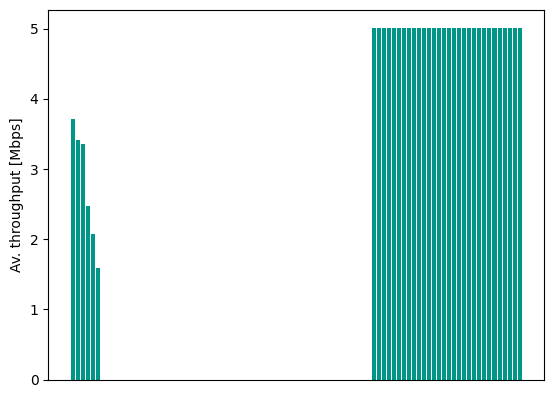

In [22]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

# Read data
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

num_sim = 1 # Number of simulations
avgLow,avgHigh = [],[]
for v in vv:
        avgLow_aux,avgHigh_aux = [],[]
        for n in range(1,num_sim+1):
                fn = f"sim_thput/resDPP_V{v:.2e}_n{n}.txt"
                df = pd.read_csv(fn, delimiter= '\t')
                avgLow_aux.append(df.head(4)['Thput'].mean())
                avgHigh_aux.append(df.tail(4)['Thput'].mean())
        avgLow.append(np.array(avgLow_aux).mean())
        avgHigh.append(np.array(avgHigh_aux).mean())

# Plot
plt.figure()
x = np.arange(len(avgLow))
plt.bar(x,avgLow, color='#009688')
plt.bar(x+2*len(avgLow),avgHigh, color='#009688')
plt.ylabel("Av. throughput [Mbps]")
plt.xticks([])

([], [])

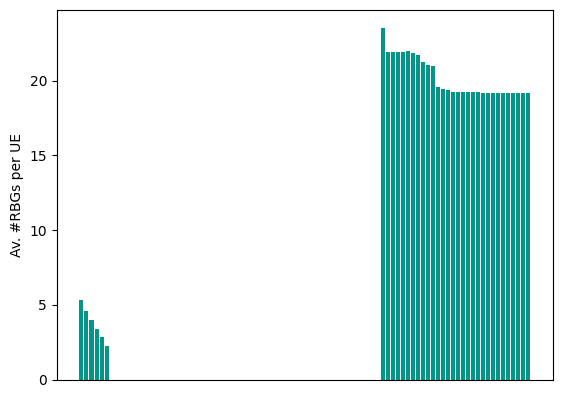

In [23]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
import pandas as pd

# Read data
step = 1
vs = np.arange(1, 5+step, step)
vs = vs*1e7
step = 1
vs2 = np.arange(1, 8+step, step)
vs2 = vs2*1e9
step = 0.2
vs3 = np.arange(9, 12+step, step)
vs3 = vs3*1e9
vv = np.concatenate((vs, vs2, vs3))
vv = np.insert(vv, 0, 0)

num_sim = 1 # Number of simulations
avgLow,avgHigh = [],[]
for v in vv:
        avgLow_aux,avgHigh_aux = [],[]
        for n in range(1,num_sim+1):
                fn = f"sim_alpha/alphaDPP_V{v:.2e}_n{n}.txt"
                df = pd.read_csv(fn, delimiter= '\t')
                avgLow_aux.append(df[df['UE'] > 4]['resources'].mean())
                avgHigh_aux.append(df[df['UE'] <= 4]['resources'].mean())
        avgLow.append(np.array(avgLow_aux).mean())
        avgHigh.append(np.array(avgHigh_aux).mean())

# Plot
plt.figure()
x = np.arange(len(avgLow))
plt.bar(x,avgLow, color='#009688')
plt.bar(x+2*len(avgLow),avgHigh, color='#009688')
plt.ylabel("Av. #RBGs per UE")
plt.xticks([])